In [61]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd
from prophet import Prophet
import datetime as dt
from IPython.display import display
%matplotlib inline
import seaborn as sns
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [49]:
df = pd.read_csv("./Resources/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [50]:
df.columns 
# Age, Department, and Monthly Income and Attrition 

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [51]:
df_filtered = df[['MonthlyIncome', 'Age', 'Department', 'Attrition']]

print(df_filtered.head())

   MonthlyIncome  Age              Department Attrition
0           5993   41                   Sales       Yes
1           5130   49  Research & Development        No
2           2090   37  Research & Development       Yes
3           2909   33  Research & Development        No
4           3468   27  Research & Development        No


In [52]:
# Checking for any missing values 

df_filtered.dropna(inplace=True)




C:\Users\ssarv\AppData\Local\Temp\ipykernel_24540\1025003212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


In [53]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [54]:
# Converting attrition to binary values 
df_filtered['Attrition'] = df_filtered['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


C:\Users\ssarv\AppData\Local\Temp\ipykernel_24540\2290788138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Attrition'] = df_filtered['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [55]:
summary_stats = df_filtered.describe()

print(summary_stats)

       MonthlyIncome          Age    Attrition
count    1470.000000  1470.000000  1470.000000
mean     6502.931293    36.923810     0.161224
std      4707.956783     9.135373     0.367863
min      1009.000000    18.000000     0.000000
25%      2911.000000    30.000000     0.000000
50%      4919.000000    36.000000     0.000000
75%      8379.000000    43.000000     0.000000
max     19999.000000    60.000000     1.000000


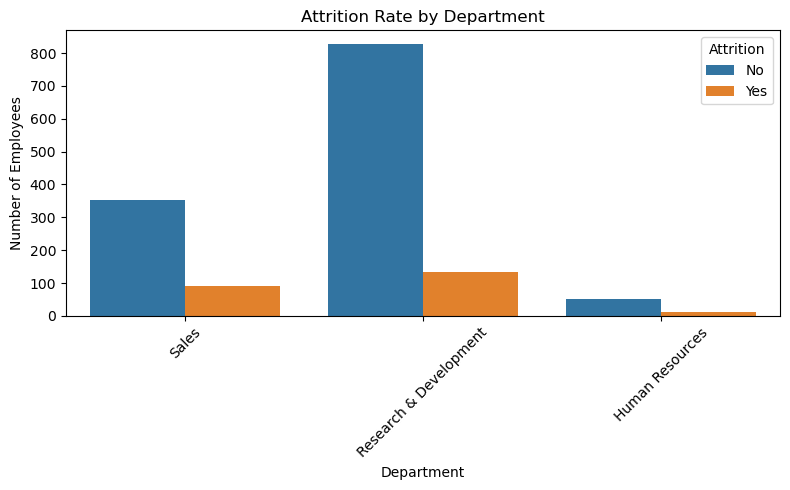

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Showing Attrition Rate by Department 

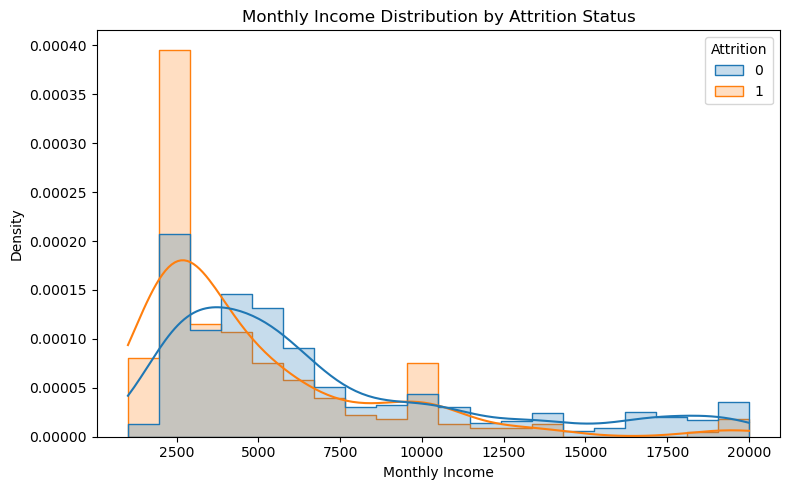

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, element='step', stat='density', common_norm=False)
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
attrition_by_department.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees Who Quit by Department')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.tight_layout()
plt.show()